In [27]:
import re
import pandas as pd
from pandas import DataFrame as DataFrame
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## 2 Data


### 1.FN4A 

### Load Dataset from drive

In [28]:
with open ("Files/FN4A.txt", "r") as file:
    data = file.read()


In [29]:
data[0:3000]

'\nUDS= 0 to 25 in 0.1 step\nUGS= 15 to 27 in 4 step\nNO. UDS ID UGS\n V A V\n1 0 -4.22731E-09 15\n2 0.1 -1.29189E-09 15\n3 0.2 1.23651E-09 15\n4 0.3 3.80388E-09 15\n5 0.4 6.11898E-09 15\n6 0.5 8.2786E-09 15\n7 0.6 1.03676E-08 15\n8 0.7 1.23828E-08 15\n9 0.8 1.43698E-08 15\n10 0.9 1.63046E-08 15\n11 1 1.82505E-08 15\n12 1.1 2.01758E-08 15\n13 1.2 2.2055E-08 15\n14 1.3 2.39331E-08 15\n15 1.4 2.57927E-08 15\n16 1.5 2.75898E-08 15\n17 1.6 2.94016E-08 15\n18 1.7 3.11808E-08 15\n19 1.8 3.29074E-08 15\n20 1.9 3.46396E-08 15\n21 2 3.63446E-08 15\n22 2.1 3.79875E-08 15\n23 2.2 3.9637E-08 15\n24 2.3 4.12578E-08 15\n25 2.4 4.28257E-08 15\n26 2.5 4.43937E-08 15\n27 2.6 4.59347E-08 15\n28 2.7 4.74409E-08 15\n29 2.8 4.89012E-08 15\n30 2.9 5.03654E-08 15\n31 3 5.17913E-08 15\n32 3.1 5.31659E-08 15\n33 3.2 5.45424E-08 15\n34 3.3 5.58948E-08 15\n35 3.4 5.71931E-08 15\n36 3.5 5.84839E-08 15\n37 3.6 5.9752E-08 15\n38 3.7 6.09669E-08 15\n39 3.8 6.21783E-08 15\n40 3.9 6.33596E-08 15\n41 4 6.44941E-08 15\n

### Separate information and categorize into groups

In [30]:
##substitue 'E' with 'e' so that python understand the floating number
data =re.sub('E','e',data)


##create a pattern for selecting desired columns and group them 
pattern = """
([\d.]*)
(\ )
(?P<Current>[.\d-]*[$e][-\d]*)
(\ )
(?P<Voltage>\d{1,2})
"""

List = []
for item in re.finditer(pattern,data,re.VERBOSE):
    List.append(item.groupdict())

In [31]:
data[0:500]

'\nUDS= 0 to 25 in 0.1 step\nUGS= 15 to 27 in 4 step\nNO. UDS ID UGS\n V A V\n1 0 -4.22731e-09 15\n2 0.1 -1.29189e-09 15\n3 0.2 1.23651e-09 15\n4 0.3 3.80388e-09 15\n5 0.4 6.11898e-09 15\n6 0.5 8.2786e-09 15\n7 0.6 1.03676e-08 15\n8 0.7 1.23828e-08 15\n9 0.8 1.43698e-08 15\n10 0.9 1.63046e-08 15\n11 1 1.82505e-08 15\n12 1.1 2.01758e-08 15\n13 1.2 2.2055e-08 15\n14 1.3 2.39331e-08 15\n15 1.4 2.57927e-08 15\n16 1.5 2.75898e-08 15\n17 1.6 2.94016e-08 15\n18 1.7 3.11808e-08 15\n19 1.8 3.29074e-08 15\n20 1.9 3.46396e-08 15\n2'

In [32]:
List[0:100]

[{'Current': '-4.22731e-09', 'Voltage': '15'},
 {'Current': '-1.29189e-09', 'Voltage': '15'},
 {'Current': '1.23651e-09', 'Voltage': '15'},
 {'Current': '3.80388e-09', 'Voltage': '15'},
 {'Current': '6.11898e-09', 'Voltage': '15'},
 {'Current': '8.2786e-09', 'Voltage': '15'},
 {'Current': '1.03676e-08', 'Voltage': '15'},
 {'Current': '1.23828e-08', 'Voltage': '15'},
 {'Current': '1.43698e-08', 'Voltage': '15'},
 {'Current': '1.63046e-08', 'Voltage': '15'},
 {'Current': '1.82505e-08', 'Voltage': '15'},
 {'Current': '2.01758e-08', 'Voltage': '15'},
 {'Current': '2.2055e-08', 'Voltage': '15'},
 {'Current': '2.39331e-08', 'Voltage': '15'},
 {'Current': '2.57927e-08', 'Voltage': '15'},
 {'Current': '2.75898e-08', 'Voltage': '15'},
 {'Current': '2.94016e-08', 'Voltage': '15'},
 {'Current': '3.11808e-08', 'Voltage': '15'},
 {'Current': '3.29074e-08', 'Voltage': '15'},
 {'Current': '3.46396e-08', 'Voltage': '15'},
 {'Current': '3.63446e-08', 'Voltage': '15'},
 {'Current': '3.79875e-08', 'Volta

### Create DataFrame from Groups (which are separated by regex pattern)

In [33]:
DF = DataFrame.from_dict(List)
DF

,Current,Voltage
0,-4.22731e-09,15
1,-1.29189e-09,15
2,1.23651e-09,15
3,3.80388e-09,15
4,6.11898e-09,15
...,...,...
999,8.98299e-07,27
1000,8.98604e-07,27
1001,8.98869e-07,27
1002,8.99082e-07,27


In [34]:
columns_titles = ["Voltage","Current"]
DF = DF.reindex(columns=columns_titles)

In [35]:
DF

,Voltage,Current
0,15,-4.22731e-09
1,15,-1.29189e-09
2,15,1.23651e-09
3,15,3.80388e-09
4,15,6.11898e-09
...,...,...
999,27,8.98299e-07
1000,27,8.98604e-07
1001,27,8.98869e-07
1002,27,8.99082e-07


In [36]:
DF.Voltage.unique()

array(['15', '19', '23', '27'], dtype=object)

In [37]:
format = lambda x: float(x)
DF = DF.applymap(format)

In [38]:
type(DF['Voltage'][0])

numpy.float64

### Export DataFrame to a CSV file

In [39]:
DF.to_csv('Files/FN4A-wrangled.csv', index = False)

## Visualization

In [40]:
#DF.set_index('group1','group2')

### Scatter Plot

Text(0, 0.5, 'Current')

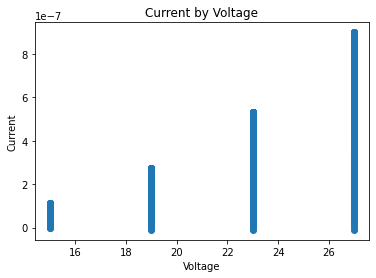

In [41]:

# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(DF['Voltage'], DF['Current'])
# set a title and labels
ax.set_title('Current by Voltage')
ax.set_xlabel('Voltage')
ax.set_ylabel('Current')

Text(0, 0.5, 'sepal_width')

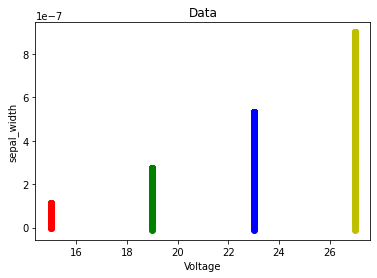

In [42]:

# create color dictionary
colors = {15:'r', 19:'g', 23:'b', 27:'y'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(DF['Current'])):
    ax.scatter(DF['Voltage'][i], DF['Current'][i] ,color=colors[DF['Voltage'][i]])
# set a title and labels
ax.set_title('Data')
ax.set_xlabel('Voltage')
ax.set_ylabel('sepal_width')

In [43]:
import plotly.express as px
fig = px.scatter(x=DF['Voltage'], y=DF['Current'])
fig.show()

### Histogram

Text(0, 0.5, 'Frequency')

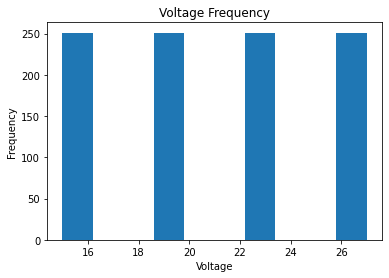

In [44]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(DF['Voltage'])
# set title and labels
ax.set_title('Voltage Frequency')
ax.set_xlabel('Voltage')
ax.set_ylabel('Frequency')

### 2.FN4T 

Doing all the same for FN4T Dataset

In [45]:
with open ("Files/FN4T.txt", "r") as file:
    data = file.read()
data =re.sub('E','e',data)
pattern = """
([\d.]*)
(\ )
(?P<Current>[.\d-]*[$e][-\d]*)
(\ )
(?P<Voltage>[.\d-]*)
"""
List2 = []
for item in re.finditer(pattern,data,re.VERBOSE):
    List2.append(item.groupdict())
   

In [46]:
DF2 = DataFrame.from_dict(List2)  
DF2

,Current,Voltage
0,4.99707e-08,-30
1,4.29938e-08,-29.8
2,3.93023e-08,-29.6
3,3.68301e-08,-29.4
4,3.45966e-08,-29.2
...,...,...
1199,7.37914e-07,29.2
1200,7.57123e-07,29.4
1201,7.7685e-07,29.6
1202,7.9673e-07,29.8


In [47]:
columns_titles = ["Voltage","Current"]
DF2 = DF2.reindex(columns=columns_titles)
DF2 = DF2.applymap(format)
DF2

,Voltage,Current
0,-30.0,4.997070e-08
1,-29.8,4.299380e-08
2,-29.6,3.930230e-08
3,-29.4,3.683010e-08
4,-29.2,3.459660e-08
...,...,...
1199,29.2,7.379140e-07
1200,29.4,7.571230e-07
1201,29.6,7.768500e-07
1202,29.8,7.967300e-07


In [48]:
DF2.Voltage.unique()

array([-30. , -29.8, -29.6, -29.4, -29.2, -29. , -28.8, -28.6, -28.4,
       -28.2, -28. , -27.8, -27.6, -27.4, -27.2, -27. , -26.8, -26.6,
       -26.4, -26.2, -26. , -25.8, -25.6, -25.4, -25.2, -25. , -24.8,
       -24.6, -24.4, -24.2, -24. , -23.8, -23.6, -23.4, -23.2, -23. ,
       -22.8, -22.6, -22.4, -22.2, -22. , -21.8, -21.6, -21.4, -21.2,
       -21. , -20.8, -20.6, -20.4, -20.2, -20. , -19.8, -19.6, -19.4,
       -19.2, -19. , -18.8, -18.6, -18.4, -18.2, -18. , -17.8, -17.6,
       -17.4, -17.2, -17. , -16.8, -16.6, -16.4, -16.2, -16. , -15.8,
       -15.6, -15.4, -15.2, -15. , -14.8, -14.6, -14.4, -14.2, -14. ,
       -13.8, -13.6, -13.4, -13.2, -13. , -12.8, -12.6, -12.4, -12.2,
       -12. , -11.8, -11.6, -11.4, -11.2, -11. , -10.8, -10.6, -10.4,
       -10.2, -10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,
        -8.4,  -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,
        -6.6,  -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,
        -4.8,  -4.6,

In [49]:
type(DF2['Voltage'][0])

numpy.float64

In [50]:
DF2.to_csv('Files/FN4T-wrangled.csv', index = False) 

## Visualization

Text(0, 0.5, 'Current')

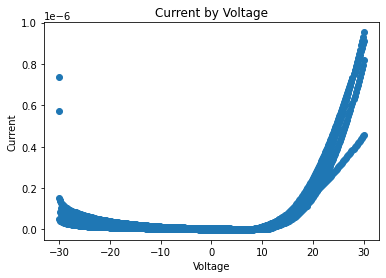

In [51]:

# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(DF2['Voltage'], DF2['Current'])
# set a title and labels
ax.set_title('Current by Voltage')
ax.set_xlabel('Voltage')
ax.set_ylabel('Current')

In [52]:
fig = px.scatter(x=DF2['Voltage'], y=DF2['Current'])
fig.show()